<a href="https://colab.research.google.com/github/SaurabhSRP/Stock-Price-Prediction-Projects/blob/main/Apple_Stock_Price_Prediction_using_AutoTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 9.9 MB/s 


In [ ]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from autots import AutoTS

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime 
from datetime import date, timedelta

In [ ]:
today=date.today()
print(today)

2022-09-25


In [ ]:
end_date=today.strftime("%Y-%m-%d")
start_date=date.today()-timedelta(days=365)

In [ ]:
data=yf.download('AAPL',start=start_date,end=end_date,progress=False)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.559952,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.119217,108972300
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.034119,74602000
2021-09-30,143.660004,144.380005,141.279999,141.500000,140.711517,89056700
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.855103,94639600
...,...,...,...,...,...,...
2022-09-19,149.309998,154.559998,149.100006,154.479996,154.479996,81474200
2022-09-20,153.399994,158.080002,153.080002,156.899994,156.899994,107689800
2022-09-21,157.339996,158.740005,153.600006,153.720001,153.720001,101696800


In [ ]:
data["Date"]=data.index
data=data[["Date","Open","High","Low","Close", "Adj Close", "Volume"]]
data.reset_index(drop=True,inplace=True)
print(data.tail())

          Date        Open        High  ...       Close   Adj Close     Volume
246 2022-09-19  149.309998  154.559998  ...  154.479996  154.479996   81474200
247 2022-09-20  153.399994  158.080002  ...  156.899994  156.899994  107689800
248 2022-09-21  157.339996  158.740005  ...  153.720001  153.720001  101696800
249 2022-09-22  152.380005  154.470001  ...  152.740005  152.740005   86652500
250 2022-09-23  151.190002  151.470001  ...  150.429993  150.429993   95939200

[5 rows x 7 columns]


In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
df=data[["Date","Close"]]
print(df.head())

        Date       Close
0 2021-09-27  145.369995
1 2021-09-28  141.910004
2 2021-09-29  142.830002
3 2021-09-30  141.500000
4 2021-10-01  142.649994


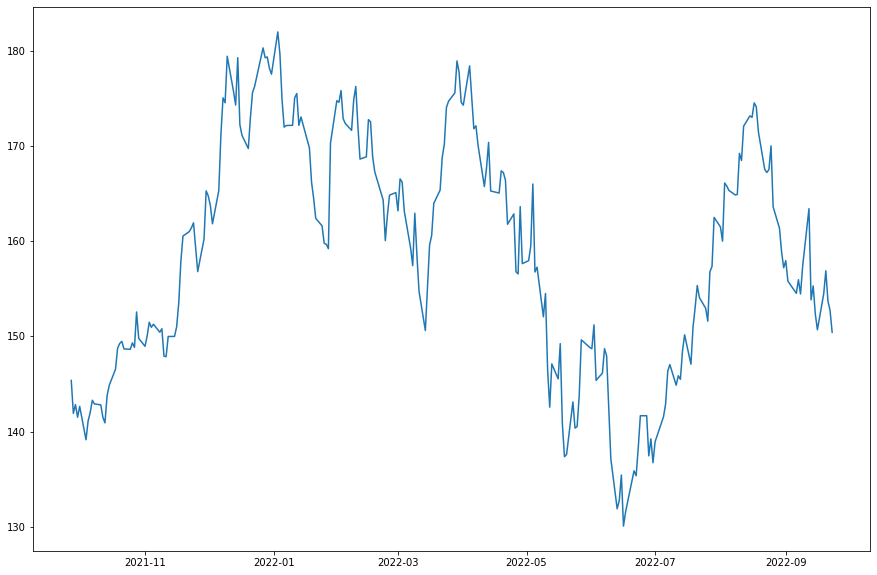

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df["Date"],df["Close"])

In [ ]:
model = AutoTS(forecast_length=10, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 7s 6ms/step - loss: 0.3882
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3859
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3838
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3838
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3807
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3799
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3786
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3729
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3678
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3665
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3637
Epoch 12/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3592
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 38 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ql7yfx9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/7m8e6kh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50116', 'data', 'file=/tmp/tmpc_zyl9m1/ql7yfx9t.json', 'init=/tmp/tmpc_zyl9m1/7m8e6kh_.json', 'output', 'file=/tmp/tmpofkghd6_/prophet_model-20220925144938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/22x7cfu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/4z_uv39s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1850', 'data', 'file=/tmp/tmpc_zyl9m1/22x7cfu5.json', 'init=/tmp/tmpc_zyl9m1/4z_uv39s.json', 'output', 'file=/tmp/tmpneszfhv6/prophet_model-20220925144943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 57 with model FBProphet in generation 0 of 10


14:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 10
Model Number: 59 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('X has 56 features, but RandomForestRegressor is expecting 58 features as input.') in model 59: DatepartRegression
Model Number: 60 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_5




Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 65: LastValueNaive
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Model Number: 70 with model ETS in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/wdgpcxmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ej76jfti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77922', 'data', 'file=/tmp/tmpc_zyl9m1/wdgpcxmr.json', 'init=/tmp/tmpc_zyl9m1/ej76jfti.json', 'output', 'file=/tmp/tmpco33h5q9/prophet_model-20220925144946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 71 with model FBProphet in generation 0 of 10


14:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 73: UnobservedComponents
Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10
Model Number: 77 with model WindowRegression in generation 0 of 10
Model Number: 78 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 78: DatepartRegression
Model Number: 79 with model Un

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 116 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 116: WindowRegression
Model Number: 117 with model MultivariateRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 118 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 118: Theta
Model Number: 119 with model UnobservedComponents in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 121: MultivariateRegression
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model LastValueNaive in generation 0 of 10
Model Number: 125 with model SeasonalNaive in generation 0 of 10
Model Number: 126 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126: DatepartRegression
Model Number: 127 with model GluonTS in generation 0 of 10
T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 131: GLM
Model Number: 132 with model AverageValueNaive in generation 0 of 10
Model Number: 133 with model LastValueNaive in generation 0 of 10
Model Number: 134 with model MultivariateRegression in generation 0 of 10
Epoch 1/100
6/6 [==============================] - 7s 22ms/step - loss: 0.2571
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2383
Epoch 3/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2182
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2173
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2061
Epoch 6/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2203
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2051
Epoch 8/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2000
Epoch 9/100
6/6 [==============================] - 0s 22ms/ste

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 138 with model ConstantNaive in generation 0 of 10
Model Number: 139 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 139: VECM
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model SectionalMotif in generation 0 of 10
Model Number: 142 with model UnobservedComponents in generation 0 of 10
Model Number: 143 with model SectionalMotif in generation 0 of 10
Model Number: 144 with model UnobservedComponents in generation 0 of 10
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model ETS in generation 0 of 10
Model Number: 147 with model LastValueNaive in generation 0 of 10
Model Number: 148 with model UnobservedComponents in generation 0 of 10
Model Number: 149 with model ETS in generation 0 of 10
Model Number: 150 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function retur

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log




Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 154: GluonTS
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 156: ARIMA
Model Number: 157 with model ConstantNaive in generation 0 of 10
Model Number: 158 with model ARIMA in generation 0 of 10
Model Number: 159 with model LastValueNaive in generation 0 of 10
Model Number: 160 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 160: GluonTS
Model Number: 161 with model LastValueNaive in generation 0 of 10
Model Number: 162 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 162: ARCH
Model Number: 163 wit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 177 with model GLS in generation 0 of 10
Model Number: 178 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 178: VAR
Model Number: 179 with model UnivariateMotif in generation 0 of 10
Model Number: 180 with model MultivariateMotif in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model UnivariateMotif in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 182: UnivariateMotif
Model Number: 183 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 183: ARDL
New Generation: 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_5




Model Number: 184 with model ConstantNaive in generation 1 of 10
Model Number: 185 with model ETS in generation 1 of 10
Model Number: 186 with model LastValueNaive in generation 1 of 10
Model Number: 187 with model Theta in generation 1 of 10
Model Number: 188 with model Theta in generation 1 of 10
Model Number: 189 with model AverageValueNaive in generation 1 of 10
Model Number: 190 with model SeasonalNaive in generation 1 of 10
Model Number: 191 with model ARIMA in generation 1 of 10
Model Number: 192 with model Theta in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/dbo4ipri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/itgbcpqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45672', 'data', 'file=/tmp/tmpc_zyl9m1/dbo4ipri.json', 'init=/tmp/tmpc_zyl9m1/itgbcpqs.json', 'output', 'file=/tmp/tmpbk6_jg_1/prophet_model-20220925145024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 193 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 193: MultivariateRegression
Model Number: 194 with model FBProphet in generation 1 of 10
Model Number: 195 with model NVAR in generation 1 of 10
Model Number: 196 with model ARIMA in generation 1 of 10
Model Number: 197 with model LastValueNaive in generation 1 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 197: LastValueNaive
Model Number: 198 with model UnobservedComponents in generation 1 of 10
Model Number: 199 with model ARIMA in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 200 with model GLS in generation 1 of 10
Model Number: 201 with model NVAR in generation 1 of 10
Model Number: 202 with model ConstantNaive in generation 1 of 10
Model Number: 203 with model Theta in generation 1 of 10
Model Number: 204 with model ETS in generation 1 of 10
Model Number: 205 with model MultivariateRegression in generation 1 of 10
Model Number: 206 with model LastValueNaive in generation 1 of 10
Model Number: 207 with model GLM in generation 1 of 10
Model Number: 208 with model MultivariateMotif in generation 1 of 10
Model Number: 209 with model UnivariateMotif in generation 1 of 10
Model Number: 210 with model ARIMA in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10
Model Number: 212 with model GLM in generation 1 of 10
Model Number: 213 with model ARIMA in generation 1 of 10
Model Number: 214 with model SeasonalNaive in generation 1 of 10
Model Number: 215 with model UnivariateRegression in generation 1 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 219 with model UnivariateRegression in generation 1 of 10
Model Number: 220 with model AverageValueNaive in generation 1 of 10
Model Number: 221 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 222 with model ARIMA in generation 1 of 10
Model Number: 223 with model AverageValueNaive in generation 1 of 10
Model Number: 224 with model AverageValueNaive in generation 1 of 10
Model Number: 225 with model MultivariateRegression in generation 1 of 10
Epoch 1/100
6/6 [==============================] - 7s 28ms/step - loss: 0.6814
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5911
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 0.5248
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 0.4740
Epoch 5/100
6/6 [==============================] - 0s 25ms/step - loss: 0.4157
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.4462
Epoch 7/100
6/6 [==============================] - 0s 28ms/step - loss: 0.4230
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.3808
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3830
Epoch 10/100
6/6 [==

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce



Model Number: 239 with model UnivariateMotif in generation 1 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 239: UnivariateMotif
Model Number: 240 with model DatepartRegression in generation 1 of 10
Model Number: 241 with model ConstantNaive in generation 1 of 10
Model Number: 242 with model UnivariateRegression in generation 1 of 10
Model Number: 243 with model UnivariateMotif in generation 1 of 10
Model Number: 244 with model WindowRegression in generation 1 of 10
Model Number: 245 with model ConstantNaive in generation 1 of 10
Model Number: 246 with model SeasonalNaive in generation 1 of 10
Model Number: 247 with model WindowRegression in generation 1 of 10
Model Number: 248 with model Theta in generation 1 of 10
Model Number: 249 with model AverageValueNaive in generation 1 of 10
Model Number: 250 with model WindowRegression in generation 1 of 10
Model Number: 251 with model MultivariateMotif in

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 269 with model GLS in generation 1 of 10
Model Number: 270 with model ARIMA in generation 1 of 10
Model Number: 271 with model ETS in generation 1 of 10
Model Number: 272 with model GLS in generation 1 of 10
Model Number: 273 with model WindowRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 274 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 275 with model UnobservedComponents in generation 1 of 10
Model Number: 276 with model SeasonalNaive in generation 1 of 10
Model Number: 277 with model ARIMA in generation 1 of 10
Model Number: 278 with model UnobservedComponents in generation 1 of 10
Model Number: 279 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 279: UnivariateRegression
Model Number: 280 with model WindowRegression in generation 1 of 10
Model Number: 281 with model ConstantNaive in generation 1 of 10
Model Number: 282 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 283 with model LastValueNaive in generation 1 of 10
Model Number: 284 with model UnivariateRegression in generation 1 of 10
Model Number: 285 with model SeasonalNaive in generation 1 of 10
Model Number: 286 with model ConstantNaive in generation 1 of 10
Model Number: 287 with model UnivariateMotif in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 288 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/9kkmtu6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/m04fokwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31759', 'data', 'file=/tmp/tmpc_zyl9m1/9kkmtu6a.json', 'init=/tmp/tmpc_zyl9m1/m04fokwi.json', 'output', 'file=/tmp/tmp1lp7i5wc/prophet_model-20220925145157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 289 with model ARIMA in generation 1 of 10
Model Number: 290 with model MultivariateMotif in generation 1 of 10
Model Number: 291 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 291: ConstantNaive
Model Number: 292 with model MultivariateMotif in generation 1 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 292: MultivariateMotif
Model Number: 293 with model AverageValueNaive in generation 1 of 10
Model Number: 294 with model Theta in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 295 with model LastValueNaive in generation 1 of 10
Model Number: 296 with model UnivariateRegression in generation 1 of 10
Model Number: 297 with model GLM in generation 1 of 10
Model Number: 298 with model GLS in generation 1 of 10
Model Number: 299 with model LastValueNaive in generation 1 of 10
Model Number: 300 with model SeasonalNaive in generation 1 of 10
Model Number: 301 with model AverageValueNaive in generation 1 of 10
Model Number: 302 with model NVAR in generation 1 of 10
Model Number: 303 with model UnivariateRegression in generation 1 of 10
New Generation: 2 of 10
Model Number: 304 with model ARIMA in generation 2 of 10
Model Number: 305 with model SeasonalNaive in generation 2 of 10
Model Number: 306 with model GLS in generation 2 of 10
Model Number: 307 with model UnivariateMotif in generation 2 of 10
Model Number: 308 with model UnivariateMotif in generation 2 of 10
Model Number: 309 with model NVAR in generation 2 of 10
Model Number: 310 with model Cons

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 333 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/5663wyis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/eh8dqce9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76167', 'data', 'file=/tmp/tmpc_zyl9m1/5663wyis.json', 'init=/tmp/tmpc_zyl9m1/eh8dqce9.json', 'output', 'file=/tmp/tmp55a7pxhy/prophet_model-20220925145208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 334 with model ConstantNaive in generation 2 of 10
Model Number: 335 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 335: MultivariateRegression
Model Number: 336 with model SeasonalNaive in generation 2 of 10
Model Number: 337 with model DatepartRegression in generation 2 of 10
Model Number: 338 with model SectionalMotif in generation 2 of 10
Model Number: 339 with model ETS in generation 2 of 10
Model Number: 340 with model ARIMA in generation 2 of 10
Model Number: 341 with model UnobservedComponents in generation 2 of 10
Model Number: 342 with model MultivariateRegression in generation 2 of 10
Model Number: 343 with model UnobservedComponents in generation 2 of 10
Model Number: 344 with model UnivariateRegression in generation 2 of 10
Model Number: 345 with model NVAR in generation 2 of 10
Model Number: 346 with model Theta in generation 2 of

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/r0w2tjar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/lgz3zd84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25349', 'data', 'file=/tmp/tmpc_zyl9m1/r0w2tjar.json', 'init=/tmp/tmpc_zyl9m1/lgz3zd84.json', 'output', 'file=/tmp/tmpt6l16x2t/prophet_model-20220925145236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 378 with model FBProphet in generation 2 of 10
Model Number: 379 with model Theta in generation 2 of 10
Model Number: 380 with model UnobservedComponents in generation 2 of 10
Model Number: 381 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 381: UnivariateMotif
Model Number: 382 with model ARIMA in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 383 with model UnivariateRegression in generation 2 of 10
Model Number: 384 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 384: MultivariateRegression
Model Number: 385 with model AverageValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 386 with model ETS in generation 2 of 10
Model Number: 387 with model AverageValueNaive in generation 2 of 10
Model Number: 388 with model DatepartRegression in generation 2 of 10
Model Number: 389 with model LastValueNaive in generation 2 of 10
Model Number: 390 with model ARIMA in generation 2 of 10
Model Number: 391 with model FBProphet in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=9.08159e-25): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/nzmns22r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/3m11cb60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98625', 'data', 'file=/tmp/tmpc_zyl9m1/nzmns22r.json', 'init=/tmp/tmpc_zyl9m1/3m11cb60.json', 'output', 'file=/tmp/tmpplg_4ewn/prophet_model-202209

Model Number: 392 with model Theta in generation 2 of 10
Model Number: 393 with model LastValueNaive in generation 2 of 10
Model Number: 394 with model LastValueNaive in generation 2 of 10
Model Number: 395 with model ARIMA in generation 2 of 10
Model Number: 396 with model WindowRegression in generation 2 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 396: WindowRegression
Model Number: 397 with model SeasonalNaive in generation 2 of 10
Model Number: 398 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 399 with model MultivariateRegression in generation 2 of 10
Model Number: 400 with model LastValueNaive in generation 2 of 10
Model Number: 401 with model SectionalMotif in generatio

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 404 with model WindowRegression in generation 2 of 10
Model Number: 405 with model LastValueNaive in generation 2 of 10
Model Number: 406 with model Theta in generation 2 of 10
Model Number: 407 with model AverageValueNaive in generation 2 of 10
Model Number: 408 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 408: GLM
Model Number: 409 with model ARIMA in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 410 with model MultivariateRegression in generation 2 of 10
Epoch 1/100
6/6 [==============================] - 6s 26ms/step - loss: 0.1099
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0681
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0735
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0724
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0718
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0729
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0678
Epoch 8/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0646
Epoch 9/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0680
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0713
Epoch 11/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0679
Epoch 12/100
6/6 [==============================] - 0s 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 419 with model GLS in generation 2 of 10
Model Number: 420 with model MultivariateMotif in generation 2 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'CumSumTransformer', '2': 'Slice'}, 'transformation_params': {'0': {}, '1': {}, '2': {'method': 0.8}}}. fail_on_forecast_nan=True") in model 420: MultivariateMotif
Model Number: 421 with model DatepartRegression in generation 2 of 10
Model Number: 422 with model NVAR in generation 2 of 10
Model Number: 423 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 423: UnobservedComponents
New Generation: 3 of 10
Model Number: 424 with model MultivariateRegression in generation 3 of 10
Model Number: 425 with model MultivariateRegression in generation 3 of 10
Model Number: 426 with model Theta in generation 3 of 10
Mo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 443 with model Theta in generation 3 of 10
Model Number: 444 with model ConstantNaive in generation 3 of 10
Model Number: 445 with model LastValueNaive in generation 3 of 10
Model Number: 446 with model GLM in generation 3 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 446: GLM
Model Number: 447 with model SeasonalNaive in generation 3 of 10
Model Number: 448 with model SeasonalNaive in generation 3 of 10
Model Number: 449 with model UnobservedComponents in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 450 with model GLM in generation 3 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 450: GLM
Model Number: 451 with model SectionalMotif in generation 3 of 10
Model Number: 452 with model NVAR in generation 3 of 10
Model Number: 453 with model GLS in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 454 with model UnivariateRegression in generation 3 of 10
Model Number: 455 with model DatepartRegression in generation 3 of 10
Model Number: 456 with model UnobservedComponents in generation 3 of 10
Model Number: 457 with model UnobservedComponents in generation 3 of 10
Model Number: 458 with model WindowRegression in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/t7_syjx7.json


Model Number: 459 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ir0p6b_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48904', 'data', 'file=/tmp/tmpc_zyl9m1/t7_syjx7.json', 'init=/tmp/tmpc_zyl9m1/ir0p6b_c.json', 'output', 'file=/tmp/tmpyqztjf9q/prophet_model-20220925145335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 460 with model Theta in generation 3 of 10
Model Number: 461 with model LastValueNaive in generation 3 of 10
Model Number: 462 with model ConstantNaive in generation 3 of 10
Model Number: 463 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 464 with model UnivariateRegression in generation 3 of 10
Model Number: 465 with model DatepartRegression in generation 3 of 10
Epoch 1/50
12/12 [==============================] - 2s 3ms/step - loss: 54538027401216.0000
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 54538014818304.0000
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 54538014818304.0000
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 54538019012608.0000
Epoch 10/50
12/12 [===========

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 475 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/egd4q9ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/04q0eie8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18038', 'data', 'file=/tmp/tmpc_zyl9m1/egd4q9ai.json', 'init=/tmp/tmpc_zyl9m1/04q0eie8.json', 'output', 'file=/tmp/tmpkn5hig99/prophet_model-20220925145344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 476 with model MultivariateRegression in generation 3 of 10
Template Eval Error: LinAlgError('Matrix is not positive definite') in model 476: MultivariateRegression
Model Number: 477 with model ConstantNaive in generation 3 of 10
Model Number: 478 with model ARIMA in generation 3 of 10
Model Number: 479 with model UnobservedComponents in generation 3 of 10
Model Number: 480 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 480: GLS
Model Number: 481 with model UnivariateMotif in generation 3 of 10
Model Number: 482 with model WindowRegression in generation 3 of 10
Model Number: 483 with model LastValueNaive in generation 3 of 10
Model Number: 484 with model UnobservedComponents in generation 3 of 10
Model Number: 485 with model GLS in generation 3 of 10
Model Number: 486 with model LastValueNaive in generation 3 of 10
No anomalies detected.
Model Number: 487 with model FBProphet in generation 3 of 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/n67geux1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/1qxx3rkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92221', 'data', 'file=/tmp/tmpc_zyl9m1/n67geux1.json', 'init=/tmp/tmpc_zyl9m1/1qxx3rkw.json', 'output', 'file=/tmp/tmp4xqb6bud/prophet_model-20220925145347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 488 with model MultivariateMotif in generation 3 of 10
Model Number: 489 with model WindowRegression in generation 3 of 10
Model Number: 490 with model LastValueNaive in generation 3 of 10
Model Number: 491 with model ConstantNaive in generation 3 of 10
Model Number: 492 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 493 with model ARIMA in generation 3 of 10
Model Number: 494 with model DatepartRegression in generation 3 of 10
Model Number: 495 with model ARIMA in generation 3 of 10
Model Number: 496 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 496: GLS
Model Number: 497 with model UnivariateRegression in generation 3 of 10
Model Number: 498 with model AverageV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 500 with model ARIMA in generation 3 of 10
Model Number: 501 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 501: FBProphet
Model Number: 502 with model Theta in generation 3 of 10
Model Number: 503 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 504 with model Theta in generation 3 of 10
Model Number: 505 with model ConstantNaive in generation 3 of 10
Model Number: 506 with model ETS in generation 3 of 10
Model Number: 507 with model DatepartRegression in generation 3 of 10
Model Number: 508 with model Theta in generation 3 of 10
Model Number: 509 with model UnobservedComponents in generation 3 of 10
Model Number: 510 with model ETS in generation 3 of 10
Model Number: 511 with model SeasonalNaive in generation 3 of 10
Model Number: 512 with model LastValueNaive in gen

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 529 with model SectionalMotif in generation 3 of 10
Model Number: 530 with model AverageValueNaive in generation 3 of 10
Model Number: 531 with model ETS in generation 3 of 10
Model Number: 532 with model MultivariateRegression in generation 3 of 10
Model Number: 533 with model MultivariateRegression in generation 3 of 10
Model Number: 534 with model GLS in generation 3 of 10
Template Eval Error: ValueError('zero-size array to reduction operation maximum which has no identity') in model 534: GLS
Model Number: 535 with model MultivariateMotif in generation 3 of 10
Model Number: 536 with model SeasonalNaive in generation 3 of 10
Model Number: 537 with model UnivariateMotif in generation 3 of 10
Model Number: 538 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 538: MultivariateRegression
Model Number: 539 with model Theta in generation 3 of 10
Model Number: 540 with 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



Template Eval Error: ValueError('shapes (10,56) and (58,) not aligned: 56 (dim 1) != 58 (dim 0)') in model 542: GLM
Model Number: 543 with model AverageValueNaive in generation 3 of 10
New Generation: 4 of 10
Model Number: 544 with model Theta in generation 4 of 10
Model Number: 545 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 545: UnobservedComponents
Model Number: 546 with model GLS in generation 4 of 10
Model Number: 547 with model GLS in generation 4 of 10
Model Number: 548 with model LastValueNaive in generation 4 of 10
Model Number: 549 with model SeasonalNaive in generation 4 of 10
Model Number: 550 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 550: ARIMA
Model Number: 551 with model SeasonalNaive in generation 4 of 10
Model Number: 552 with model ConstantNaive in generation 4 of 10
Model Number: 553 w

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 555 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 555: ARIMA
Model Number: 556 with model Theta in generation 4 of 10
Model Number: 557 with model SeasonalNaive in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ptu1wn6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/dd4ezep9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1180', 'data', 'file=/tmp/tmpc_zyl9m1/ptu1wn6i.json', 'init=/tmp/tmpc_zyl9m1/dd4ezep9.json', 'output', 'file=/tmp/tmptkewd6wh/prophet_model-20220925145405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 558 with model FBProphet in generation 4 of 10


14:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 559 with model AverageValueNaive in generation 4 of 10
Model Number: 560 with model UnobservedComponents in generation 4 of 10
Model Number: 561 with model UnivariateRegression in generation 4 of 10
Model Number: 562 with model SeasonalNaive in generation 4 of 10
Model Number: 563 with model ARIMA in generation 4 of 10
Model Number: 564 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 564: DatepartRegression
Model Number: 565 with model ConstantNaive in generation 4 of 10
Model Number: 566 with model WindowRegression in generation 4 of 10
Model Number: 567 with model ConstantNaive in generation 4 of 10
Model Number: 568 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'PowerTransformer', '1': 'Detrend', '2': 'SeasonalDifference'}, 'transformation_params'

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 588 with model MultivariateMotif in generation 4 of 10
Model Number: 589 with model UnivariateRegression in generation 4 of 10
Model Number: 590 with model NVAR in generation 4 of 10
Model Number: 591 with model LastValueNaive in generation 4 of 10
Model Number: 592 with model UnobservedComponents in generation 4 of 10
Model Number: 593 with model MultivariateMotif in generation 4 of 10
Model Number: 594 with model MultivariateRegression in generation 4 of 10
Model Number: 595 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 596 with model GLM in generation 4 of 10
Model Number: 597 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 597: MultivariateRegression
Model Number: 598 with model ETS in generation 4 of 10

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 604 with model UnivariateMotif in generation 4 of 10
Model Number: 605 with model UnobservedComponents in generation 4 of 10
Model Number: 606 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 2021-12-20 00:00:00 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 2021-12-21 00:00:00 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 2021-12-22 00:00:00 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 609 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 609: ConstantNaive
Model Number: 610 with model GLM in generation 4 of 10
Model Number: 611 with model ARIMA in generation 4 of 10
Model Number: 612 with model Theta in generation 4 of 10
Model Number: 613 with model ETS in generation 4 of 10
Model Number: 614 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 615 with model AverageValueNaive in generation 4 of 10
Model Number: 616 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 616: ETS
Model Number: 617 with model SeasonalNaive in generation 4 of 10
Model Number: 618 with model SectionalMotif i

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/gi7jpun0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/z2i3f638.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48325', 'data', 'file=/tmp/tmpc_zyl9m1/gi7jpun0.json', 'init=/tmp/tmpc_zyl9m1/z2i3f638.json', 'output', 'file=/tmp/tmpjxqh9u33/prophet_model-20220925145442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 628 with model FBProphet in generation 4 of 10


14:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 629 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 629: DatepartRegression
Model Number: 630 with model LastValueNaive in generation 4 of 10
Model Number: 631 with model DatepartRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 632 with model NVAR in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 633 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/exc7v1e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/1u16lznt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33458', 'data', 'file=/tmp/tmpc_zyl9m1/exc7v1e3.json', 'init=/tmp/tmpc_zyl9m1/1u16lznt.json', 'output', 'file=/tmp/tmpvkh1gjo2/prophet_model-20220925145444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with dail

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'PowerTransformer', '1': 'MaxAbsScaler', '2': 'MinMaxScaler'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 633: FBProphet
Model Number: 634 with model FBProphet in generation 4 of 10
Model Number: 635 with model ConstantNaive in generation 4 of 10
Model Number: 636 with model WindowRegression in generation 4 of 10
Model Number: 637 with model SeasonalNaive in generation 4 of 10
Model Number: 638 with model MultivariateMotif in generation 4 of 10
Model Number: 639 with model MultivariateRegression in generation 4 of 10
Model Number: 640 with model Theta in generation 4 of 10
Model Number: 641 with model AverageValueNaive in generation 4 of 10
Model Number: 642 with model UnivariateMotif in generation 4 of 10
Model Number: 643 with model ARIMA in generation 4 of 10
Model Number: 644 with model GLS in generation 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/te00lchp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/u_uh1tbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42995', 'data', 'file=/tmp/tmpc_zyl9m1/te00lchp.json', 'init=/tmp/tmpc_zyl9m1/u_uh1tbu.json', 'output', 'file=/tmp/tmprbrlruve/prophet_model-20220925145455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 656 with model LastValueNaive in generation 4 of 10
Model Number: 657 with model UnivariateRegression in generation 4 of 10
Model Number: 658 with model MultivariateRegression in generation 4 of 10
Model Number: 659 with model ETS in generation 4 of 10
Model Number: 660 with model UnivariateRegression in generation 4 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 660: UnivariateRegression
Model Number: 661 with model LastValueNaive in generation 4 of 10
Model Number: 662 with model UnivariateRegression in generation 4 of 10
Model Number: 663 with model AverageValueNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 664 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 664: ARIMA
Model Number: 665 with model Theta in generation 5 of 10
Model Number: 666 with model WindowRegression in generation 5 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 681 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 681: DatepartRegression
Model Number: 682 with model Theta in generation 5 of 10
Model Number: 683 with model GLM in generation 5 of 10
Model Number: 684 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 685 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/b0lco4_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/jfztkgve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42920', 'data', 'file=/tmp/tmpc_zyl9m1/b0lco4_o.json', 'init=/tmp/tmpc_zyl9m1/jfztkgve.json', 'output', 'file=/tmp/tmpcov9bnrz/prophet_model-20220925145501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 686 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 686: GLM
Model Number: 687 with model NVAR in generation 5 of 10
Model Number: 688 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 689 with model ETS in generation 5 of 10
Model Number: 690 with model ARIMA in generation 5 of 10
Model Number: 691 with model MultivariateMotif in generation 5 of 10
Model Number: 692 with model GLS in generation 5 of 10
Model Number: 693 with model AverageValueNaive in generation 5 of 10
Model Number: 694 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 695 with model UnivariateRegression in generation 5 of 10
Model Number: 696 with model MultivariateRegression in generation 5 of 10
Model Number: 697 with model UnobservedComponents in generation 5 of 10
Model Number: 698 with model Theta in generation 5 of 10
Model Number: 699 with model ARIMA in generation 5 of 10
Model Number: 700 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 700: Multivariat

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 732 with model ARIMA in generation 5 of 10
Model Number: 733 with model Theta in generation 5 of 10
Model Number: 734 with model LastValueNaive in generation 5 of 10
Model Number: 735 with model Theta in generation 5 of 10
Model Number: 736 with model DatepartRegression in generation 5 of 10
Model Number: 737 with model UnivariateMotif in generation 5 of 10
Model Number: 738 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 739 with model MultivariateRegression in generation 5 of 10
Model Number: 740 with model GLS in generation 5 of 10
Model Number: 741 with model ETS in generation 5 of 10
Model Number: 742 with model ETS in generation 5 of 10
Model Number: 743 with model LastValueNaive in generation 5 of 10
Model Number: 744 with model AverageValueNaive in generation 5 of 10
Model Number: 745 with model UnobservedComponents in generation 5 of 10
Model Number: 746 with model WindowRegression in generation 5 of 10
Model Number: 747 with model NVAR in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 748 with model DatepartRegression in generation 5 of 10
Model Number: 749 with model Theta in generation 5 of 10
Model Number: 750 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 751 with model MultivariateRegression in generation 5 of 10
Model Number: 752 with model Theta in generation 5 of 10
Model Number: 753 with model WindowRegression in generation 5 of 10
Model Number: 754 with model DatepartRegression in generation 5 of 10
[LibLinear][LibLinear][LibLinear]Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 754: DatepartRegression
Model Number: 755 with model UnivariateMotif in generation 5 of 10
Model Number: 756 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 757 with model AverageValueNaive in generation 5 of 10
Model Number: 758 with model GLS in generation 5 of 10
Model Number: 759 with model UnivariateRegression in generation 5 of 10
New Generation: 6 of 10
Model Number: 760 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 760: UnivariateRegression
Model Number: 761 with model AverageValueNaive in generation 6 of 10
Model Number: 762 with model Theta in generation 6 of 10
Model Number: 763 with model ARIMA in generation 6 of 10
Model Number: 764 with model GLS in generation 6 of 10
Model Number: 765 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'PowerTransformer', '1': 'SeasonalDifference'}, 'transformation_params': {'0': {}, '1': {'lag_1': 7, 'method': 'LastValue'}}}. fail_on_forecast_nan=True")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 771 with model WindowRegression in generation 6 of 10
Model Number: 772 with model Theta in generation 6 of 10
Model Number: 773 with model NVAR in generation 6 of 10
Model Number: 774 with model Theta in generation 6 of 10
Model Number: 775 with model MultivariateMotif in generation 6 of 10
Model Number: 776 with model UnivariateMotif in generation 6 of 10
Model Number: 777 with model GLS in generation 6 of 10
Model Number: 778 with model UnivariateRegression in generation 6 of 10
Model Number: 779 with model SeasonalNaive in generation 6 of 10
Model Number: 780 with model GLS in generation 6 of 10
Model Number: 781 with model UnivariateRegression in generation 6 of 10
Model Number: 782 with model LastValueNaive in generation 6 of 10
Model Number: 783 with model ARIMA in generation 6 of 10
Model Number: 784 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend compon

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/jocm5p4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/a9l7y_7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70836', 'data', 'file=/tmp/tmpc_zyl9m1/jocm5p4p.json', 'init=/tmp/tmpc_zyl9m1/a9l7y_7j.json', 'output', 'file=/tmp/tmpt7dmv90o/prophet_model-20220925145528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 794 with model FBProphet in generation 6 of 10


14:55:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 795 with model DatepartRegression in generation 6 of 10
Model Number: 796 with model GLS in generation 6 of 10
Model Number: 797 with model ConstantNaive in generation 6 of 10
Model Number: 798 with model ConstantNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 798: ConstantNaive
Model Number: 799 with model NVAR in generation 6 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 799: NVAR
Model Number: 800 with model MultivariateRegression in generation 6 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 800: MultivariateRegression
Model Number: 801 with model LastValueNaive in generation 6 of 10
Model Number: 802 with model SeasonalNaive in generation 6 of 10
Model Number: 803 with model ARIMA in generation 6 of 10
Model Number: 804 with model NVAR in generation 6 of 10
Model Number: 805 with model NVAR in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/rhfne3ye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/nfh6v8o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16725', 'data', 'file=/tmp/tmpc_zyl9m1/rhfne3ye.json', 'init=/tmp/tmpc_zyl9m1/nfh6v8o3.json', 'output', 'file=/tmp/tmpycn6f17z/prophet_model-20220925145532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 813 with model DatepartRegression in generation 6 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 813: DatepartRegression
Model Number: 814 with model FBProphet in generation 6 of 10
Model Number: 815 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 815: UnobservedComponents
Model Number: 816 with model ConstantNaive in generation 6 of 10
Model Number: 817 with model ARIMA in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning:

invalid value encountered in multiply



Model Number: 818 with model MultivariateMotif in generation 6 of 10
Model Number: 819 with model ConstantNaive in generation 6 of 10
Model Number: 820 with model Theta in generation 6 of 10
Model Number: 821 with model ConstantNaive in generation 6 of 10
Model Number: 822 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 822: WindowRegression
Model Number: 823 with model UnivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 823: UnivariateRegression
Model Number: 824 with model ETS in generation 6 of 10
Model Number: 825 with model ARIMA in generation 6 of 10
Model Number: 826 with model UnobservedComponents in generation 6 of 10
Model Number: 827 with model SectionalMotif in generation 6 of 10
Model Number: 828 with model UnivariateMotif in generation 6 of 10
Model Number: 829 with model NVAR in generation 6 of 10
Mo

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 834: MultivariateRegression
Model Number: 835 with model ARIMA in generation 6 of 10
Model Number: 836 with model UnivariateRegression in generation 6 of 10
Model Number: 837 with model GLM in generation 6 of 10
Model Number: 838 with model DatepartRegression in generation 6 of 10
Model Number: 839 with model WindowRegression in generation 6 of 10
Model Number: 840 with model ConstantNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 841 with model GLM in generation 6 of 10
Model Number: 842 with model Theta in generation 6 of 10
Model Number: 843 with model ETS in generation 6 of 10
Model Number: 844 with model UnivariateMotif in generation 6 of 10
Model Number: 845 with model AverageValueNaive in generation 6 of 10
Model Number: 846 with model MultivariateRegression in generation 6 of 10
Model Number: 847 with model SeasonalNaive in generation 6 of 10
Model Number: 848 with model Theta in generation 6 of 10
Model Number: 849 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 849: Theta
Model Number: 850 with model ARIMA in generation 6 of 10
Model Number: 851 with model AverageValueNaive in generation 6 of 10
Model Number: 852 with model WindowRegression in generation 6 of 10
Model Number: 853 with model ConstantNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 853: ConstantNaive
Model N

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide



New Generation: 7 of 10
Model Number: 856 with model GLS in generation 7 of 10
Model Number: 857 with model ConstantNaive in generation 7 of 10
Model Number: 858 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/2qrvkawa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/jhbmnrtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90090', 'data', 'file=/tmp/tmpc_zyl9m1/2qrvkawa.json', 'init=/tmp/tmpc_zyl9m1/jhbmnrtb.json', 'output', 'file=/tmp/tmpmlr5tg7x/prophet_model-20220925145554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 859 with model AverageValueNaive in generation 7 of 10
Model Number: 860 with model GLM in generation 7 of 10
Template Eval Error: ValueError('shapes (10,56) and (58,) not aligned: 56 (dim 1) != 58 (dim 0)') in model 860: GLM
Model Number: 861 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 861: MultivariateRegression
Model Number: 862 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 862: AverageValueNaive
Model Number: 863 with model ConstantNaive in generation 7 of 10
Model Number: 864 with model SectionalMotif in generation 7 of 10
Model Number: 865 with model Theta in generation 7 of 10
Model Number: 866 with model SeasonalNaive in generation 7 of 10
Model Number: 867 with model GLS in generation 7 of 10
Model Number: 868 with model GLS in generation 7 of 10
Model Number: 869 with m

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 879 with model UnivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 879: UnivariateRegression
Model Number: 880 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/fp11m5cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/7yuopyh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66191', 'data', 'file=/tmp/tmpc_zyl9m1/fp11m5cw.json', 'init=/tmp/tmpc_zyl9m1/7yuopyh3.json', 'output', 'file=/tmp/tmpjbar_ejr/prophet_model-20220925145601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 881 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 881: NVAR
Model Number: 882 with model ETS in generation 7 of 10
Model Number: 883 with model UnobservedComponents in generation 7 of 10
Model Number: 884 with model MultivariateMotif in generation 7 of 10
Model Number: 885 with model LastValueNaive in generation 7 of 10
Model Number: 886 with model SectionalMotif in generation 7 of 10
Model Number: 887 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 887: DatepartRegression
Model Number: 888 with model NVAR in generation 7 of 10
Model Number: 889 with model ARIMA in generation 7 of 10
Model Number: 890 with model GLM in generation 7 of 10
Model Number: 891 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 892 with model WindowRegression in generation 7 of 10
Model Number: 893 with model MultivariateRegression in generation 7 of 10
Model Number: 894 with model DatepartRegression in generation 7 of 10
Model Number: 895 with model WindowRegression in generation 7 of 10
Model Number: 896 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 896: MultivariateMotif
Model Number: 897 with model LastValueNaive in generation 7 of 10
Model Number: 898 with model Theta in generation 7 of 10
Model Number: 899 with model MultivariateRegression in generation 7 of 10
Model Number: 900 with model UnivariateRegression in generation 7 of 10
Model Number: 901 with model Theta in generation 7 of 10
Model Number: 902 with model MultivariateMotif in generation 7 of 10
Model Number: 903 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueErro

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 930 with model GLS in generation 7 of 10
Model Number: 931 with model GLS in generation 7 of 10
Model Number: 932 with model GLS in generation 7 of 10
Model Number: 933 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/3fbfx89_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/xzu9936i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75455', 'data', 'file=/tmp/tmpc_zyl9m1/3fbfx89_.json', 'init=/tmp/tmpc_zyl9m1/xzu9936i.json', 'output', 'file=/tmp/tmp1gxehh_c/prophet_model-20220925145611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 934 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 934: UnivariateMotif
Model Number: 935 with model Theta in generation 7 of 10
Model Number: 936 with model UnivariateRegression in generation 7 of 10
Model Number: 937 with model LastValueNaive in generation 7 of 10
Model Number: 938 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 938: ARIMA
Model Number: 939 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.313308607365798, tolerance: 16.81372568270892



Model Number: 940 with model SeasonalNaive in generation 7 of 10
Model Number: 941 with model DatepartRegression in generation 7 of 10
Model Number: 942 with model GLS in generation 7 of 10
Model Number: 943 with model ARIMA in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 944 with model ARIMA in generation 7 of 10
Model Number: 945 with model Theta in generation 7 of 10
Model Number: 946 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("'shape' elements cannot be negative") in model 946: UnobservedComponents
Model Number: 947 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('X has 56 features, but ExtraTreesRegressor is expecting 58 features as input.') in model 947: DatepartRegression
Model Number: 948 with model ARIMA in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_5




Model Number: 949 with model SeasonalNaive in generation 7 of 10
Model Number: 950 with model WindowRegression in generation 7 of 10
Model Number: 951 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 951: ARIMA
New Generation: 8 of 10
Model Number: 952 with model UnivariateMotif in generation 8 of 10
Model Number: 953 with model UnivariateRegression in generation 8 of 10
Model Number: 954 with model ARIMA in generation 8 of 10
Model Number: 955 with model SeasonalNaive in generation 8 of 10
Model Number: 956 with model ARIMA in generation 8 of 10
Model Number: 957 with model Theta in generation 8 of 10
Model Number: 958 with model NVAR in generation 8 of 10
Model Number: 959 with model FBProphet in generation 8 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 959: FBProphet
Model Number: 960 with model Theta in generation 8 of 10
Templa

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 979 with model ConstantNaive in generation 8 of 10
Model Number: 980 with model ARIMA in generation 8 of 10
Model Number: 981 with model Theta in generation 8 of 10
Model Number: 982 with model MultivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 982: MultivariateMotif
Model Number: 983 with model AverageValueNaive in generation 8 of 10
Model Number: 984 with model LastValueNaive in generation 8 of 10
Model Number: 985 with model Theta in generation 8 of 10
Model Number: 986 with model ARIMA in generation 8 of 10
Model Number: 987 with model ETS in generation 8 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 988 with model MultivariateRegression in generation 8 of 10
Model Number: 989 with model ARIMA in generation 8 of 10
Model Number: 990 with model MultivariateRegression in generation 8 of 10
Model Numbe

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 999 with model UnobservedComponents in generation 8 of 10
Model Number: 1000 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1000: SectionalMotif
Model Number: 1001 with model SeasonalNaive in generation 8 of 10
Model Number: 1002 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 1002: AverageValueNaive
Model Number: 1003 with model WindowRegression in generation 8 of 10
Model Number: 1004 with model Theta in generation 8 of 10
Model Number: 1005 with model Theta in generation 8 of 10
Model Number: 1006 with model WindowRegression in generation 8 of 10
Model Number: 1007 with model SectionalMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 1008 with model WindowRegression in generation 8 of 10
Model Number: 1009 with model GLS in generation 8 of 10
Model Number: 1010 with model MultivariateRegression in generation 8 of 10
Model Number: 1011 with model ConstantNaive in generation 8 of 10
Model Number: 1012 with model WindowRegression in generation 8 of 10
Model Number: 1013 with model ETS in generation 8 of 10
Model Number: 1014 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1014: GLM
Model Number: 1015 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1015: GLM
Model Number: 1016 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 1017 with model UnivariateMotif in generation 8 of 10
Model Number: 1018 with model WindowRegression in generation 8 of 10
Model Number: 1019 with model ConstantNaive in generation 8 of 10
Model Number: 1020 with model ConstantNaive in generation 8 of 10
Model Number: 1021 with model GLS in generation 8 of 10
Model Number: 1022 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1022: ARIMA
Model Number: 1023 with model UnivariateRegression in generation 8 of 10
Model Number: 1024 with model SectionalMotif in generation 8 of 10
Model Number: 1025 with model LastValueNaive in generation 8 of 10
Model Number: 1026 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1026: MultivariateRegression
Model Number: 1027 with model GLS in generation 8 of 10
Model Number: 1028 with model GLS i

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/_wbbpmul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/wgepjx2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5248', 'data', 'file=/tmp/tmpc_zyl9m1/_wbbpmul.json', 'init=/tmp/tmpc_zyl9m1/wgepjx2i.json', 'output', 'file=/tmp/tmptmtglyyx/prophet_model-20220925145646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1037 with model FBProphet in generation 8 of 10
Model Number: 1038 with model NVAR in generation 8 of 10
Model Number: 1039 with model ARIMA in generation 8 of 10
Model Number: 1040 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1040: UnivariateRegression
Model Number: 1041 with model UnivariateRegression in generation 8 of 10
Model Number: 1042 with model SeasonalNaive in generation 8 of 10
Model Number: 1043 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 1043: UnivariateRegression
Model Number: 1044 with model SeasonalNaive in generation 8 of 10
Model Number: 1045 with model MultivariateMotif in generation 8 of 10
Model Number: 1046 with model ARIMA in generation 8 of 10
Model Number: 1047 with model ETS in generation 8 of 10
ET

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1063 with model UnivariateMotif in generation 9 of 10
Model Number: 1064 with model GLS in generation 9 of 10
Model Number: 1065 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1066 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1066: ARIMA
Model Number: 1067 with model WindowRegression in generation 9 of 10
Model Number: 1068 with model SeasonalNaive in generation 9 of 10
Model Number: 1069 with model WindowRegression in generation 9 of 10
Model Number: 1070 with model UnivariateRegression in generation 9 of 10
Model Number: 1071 with model LastValueNaive in generation 9 of 10
Model Number: 1072 with model UnobservedComponents in generation 9 of 10
Model Number: 1073 with model WindowRegression in generation 9 of 10
Model Number: 1074 with mode

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:798: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1087 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1087: MultivariateRegression
Model Number: 1088 with model NVAR in generation 9 of 10
Model Number: 1089 with model ARIMA in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Model Number: 1090 with model LastValueNaive in generation 9 of 10
Model Number: 1091 with model ConstantNaive in generation 9 of 10
Model Number: 1092 with model UnivariateRegression in generation 9 of 10
Model Number: 1093 with model WindowRegression in generation 9 of 10
Model Number: 1094 with model GLS in generation 9 of 10
Model Number: 1095 with model UnivariateRegression in generation 9 of 10
Model Number: 1096 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1097 with model FBProphet in generation 9 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/bjop65oj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ygsp3l42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35665', 'data', 'file=/tmp/tmpc_zyl9m1/bjop65oj.json', 'init=/tmp/tmpc_zyl9m1/ygsp3l42.json', 'output', 'file=/tmp/tmpyjxtbjs7/prophet_model-20220925145722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1098 with model AverageValueNaive in generation 9 of 10
Model Number: 1099 with model Theta in generation 9 of 10
Model Number: 1100 with model DatepartRegression in generation 9 of 10
Model Number: 1101 with model LastValueNaive in generation 9 of 10
Model Number: 1102 with model GLM in generation 9 of 10
Model Number: 1103 with model AverageValueNaive in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1104 with model ConstantNaive in generation 9 of 10
Model Number: 1105 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (16)') in model 1105: SectionalMotif
Model Number: 1106 with model GLS in generation 9 of 10
Model Number: 1107 with model GLS in generation 9 of 10
Model Number: 1108 with model ETS in generation 9 of 10
Model Number: 1109 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1110 with model GLM in generation 9 of 10
Model Number: 1111 with model ARIMA in generation 9 of 10
Model Number: 1112 with model Theta in generation 9 of 10
Model Number: 1113 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 1113: ARIMA
Model Number: 1114 with model DatepartRegression in generation 9 of 10
Model Number:

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1122 with model LastValueNaive in generation 9 of 10
Model Number: 1123 with model Theta in generation 9 of 10
Model Number: 1124 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1124: UnivariateMotif
Model Number: 1125 with model NVAR in generation 9 of 10
Model Number: 1126 with model ETS in generation 9 of 10
Model Number: 1127 with model SeasonalNaive in generation 9 of 10
Model Number: 1128 with model Theta in generation 9 of 10
Model Number: 1129 with model MultivariateRegression in generation 9 of 10
Model Number: 1130 with model LastValueNaive in generation 9 of 10
Model Number: 1131 with model NVAR in generation 9 of 10
Model Number: 1132 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1132: LastValueNaive
Model Number: 1133 with model AverageValueNaive in generation 9 of 10
Model Number: 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.69924e-25): result may not be accurate.



Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1138: UnobservedComponents
Model Number: 1139 with model WindowRegression in generation 9 of 10
Model Number: 1140 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1140: DatepartRegression
Model Number: 1141 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1141: ConstantNaive
Model Number: 1142 with model NVAR in generation 9 of 10
Model Number: 1143 with model LastValueNaive in generation 9 of 10
New Generation: 10 of 10
Model Number: 1144 with model LastValueNaive in generation 10 of 10
Model Number: 1145 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1145: WindowRegression
Model Number: 1146 with model AverageValueNaive in generation 10 of 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:532: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1157 with model ARIMA in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1157: ARIMA
Model Number: 1158 with model UnivariateRegression in generation 10 of 10
Model Number: 1159 with model NVAR in generation 10 of 10
Model Number: 1160 with model ConstantNaive in generation 10 of 10
Model Number: 1161 with model UnivariateRegression in generation 10 of 10
Model Number: 1162 with model MultivariateMotif in generation 10 of 10
Model Number: 1163 with model AverageValueNaive in generation 10 of 10
Model Number: 1164 with model ARIMA in generation 10 of 10
Model Number: 1165 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1165: MultivariateRegression
Model Number: 1166 with model SeasonalNaive in generation 10 of 10
Model Number: 1167 with model GLS in generation 10 of 10
Model Number: 1168 with model UnivariateRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=5.16494e-25): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1204 with model LastValueNaive in generation 10 of 10
Model Number: 1205 with model Theta in generation 10 of 10
Model Number: 1206 with model GLM in generation 10 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1206: GLM
Model Number: 1207 with model ConstantNaive in generation 10 of 10
Model Number: 1208 with model ETS in generation 10 of 10
Model Number: 1209 with model SeasonalNaive in generation 10 of 10

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log




Model Number: 1210 with model Theta in generation 10 of 10
Model Number: 1211 with model SeasonalNaive in generation 10 of 10
Model Number: 1212 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 1212: MultivariateRegression
Model Number: 1213 with model MultivariateMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Model Number: 1214 with model AverageValueNaive in generation 10 of 10
Model Number: 1215 with model ARIMA in generation 10 of 10
Model Number: 1216 with model Ensemble in generation 11 of Ensembles
Epoch 1/50
5/5 [==============================] - 5s 202ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 2/50
5/5 [==============================] - 0s 67ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 3/50
5/5 [==============================] - 0s 64ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 4/50
5/5 [==============================] - 0s 78ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 5/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 6/50
5/5 [==============================] - 0s 66ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 7/50
5/5 [==============================] - 0s 70ms/step - loss: 9.9613e-04 - val_loss: 0.0016
Epoch 8/50
5/5 [==============================] - 0s 65ms/step - loss: 8.9246e-04 - val_loss: 0.0014
Epoch 9/50
5/5 [

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



59 - ARIMA with avg smape 4.55: 
Model Number: 60 of 179 with model Theta for Validation 1
60 - Theta with avg smape 6.75: 
Model Number: 61 of 179 with model GLS for Validation 1
61 - GLS with avg smape 4.79: 
Model Number: 62 of 179 with model NVAR for Validation 1
62 - NVAR with avg smape 1.86: 
Model Number: 63 of 179 with model GLS for Validation 1
63 - GLS with avg smape 4.75: 
Model Number: 64 of 179 with model GLS for Validation 1
64 - GLS with avg smape 4.75: 
Model Number: 65 of 179 with model GLS for Validation 1
65 - GLS with avg smape 4.76: 
Model Number: 66 of 179 with model Theta for Validation 1
66 - Theta with avg smape 6.75: 
Model Number: 67 of 179 with model Theta for Validation 1
67 - Theta with avg smape 6.75: 
Model Number: 68 of 179 with model Theta for Validation 1
68 - Theta with avg smape 8.98: 
Model Number: 69 of 179 with model ARIMA for Validation 1
69 - ARIMA with avg smape 6.95: 
Model Number: 70 of 179 with model ARIMA for Validation 1
70 - ARIMA with a

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



92 - UnivariateMotif with avg smape 3.63: 
Model Number: 93 of 179 with model SeasonalNaive for Validation 1
93 - SeasonalNaive with avg smape 8.3: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 1
94 - SeasonalNaive with avg smape 4.5: 
Model Number: 95 of 179 with model SeasonalNaive for Validation 1
95 - SeasonalNaive with avg smape 4.7: 
Model Number: 96 of 179 with model LastValueNaive for Validation 1
96 - LastValueNaive with avg smape 7.5: 
Model Number: 97 of 179 with model MultivariateRegression for Validation 1
97 - MultivariateRegression with avg smape 4.7: 
Model Number: 98 of 179 with model WindowRegression for Validation 1
98 - WindowRegression with avg smape 1.54: 
Model Number: 99 of 179 with model ETS for Validation 1
99 - ETS with avg smape 1.98: 
Model Number: 100 of 179 with model DatepartRegression for Validation 1
100 - DatepartRegression with avg smape 7.31: 
Model Number: 101 of 179 with model GLM for Validation 1
101 - GLM with avg smape 4.39: 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



102 - AverageValueNaive with avg smape 3.81: 
Model Number: 103 of 179 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
103 - ETS with avg smape 2.18: 
Model Number: 104 of 179 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
104 - ETS with avg smape 2.18: 
Model Number: 105 of 179 with model SeasonalNaive for Validation 1
105 - SeasonalNaive with avg smape 1.52: 
Model Number: 106 of 179 with model NVAR for Validation 1
106 - NVAR with avg smape 9.42: 
Model Number: 107 of 179 with model ETS for Validation 1
107 - ETS with avg smape 5.63: 
Model Number: 108 of 179 with model MultivariateMotif for Validation 1
108 - MultivariateMotif with avg smape 4.25: 
Model Number: 109 of 179 with model WindowRegression for Validation 1
109 - WindowRegression with av

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



118 - WindowRegression with avg smape 3.47: 
Model Number: 119 of 179 with model NVAR for Validation 1
119 - NVAR with avg smape 5.63: 
Model Number: 120 of 179 with model LastValueNaive for Validation 1
120 - LastValueNaive with avg smape 7.83: 
Model Number: 121 of 179 with model LastValueNaive for Validation 1
121 - LastValueNaive with avg smape 7.83: 
Model Number: 122 of 179 with model LastValueNaive for Validation 1
122 - LastValueNaive with avg smape 9.17: 
Model Number: 123 of 179 with model WindowRegression for Validation 1
123 - WindowRegression with avg smape 8.21: 
Model Number: 124 of 179 with model AverageValueNaive for Validation 1
124 - AverageValueNaive with avg smape 3.26: 
Model Number: 125 of 179 with model LastValueNaive for Validation 1
125 - LastValueNaive with avg smape 7.88: 
Model Number: 126 of 179 with model DatepartRegression for Validation 1
126 - DatepartRegression with avg smape 3.56: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 127 of 179 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/3hn6rnql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/sjdppqlu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57216', 'data', 'file=/tmp/tmpc_zyl9m1/3hn6rnql.json', 'init=/tmp/tmpc_zyl9m1/sjdppqlu.json', 'output', 'file=/tmp/tmpixpv3w_t/prophet_model-20220925150349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:03:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


127 - FBProphet with avg smape 7.56: 
Model Number: 128 of 179 with model AverageValueNaive for Validation 1
128 - AverageValueNaive with avg smape 4.47: 
Model Number: 129 of 179 with model DatepartRegression for Validation 1
129 - DatepartRegression with avg smape 5.95: 
Model Number: 130 of 179 with model AverageValueNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ztlw84ld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/86fxrwfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97955', 'data', 'file=/tmp/tmpc_zyl9m1/ztlw84ld.json', 'init=/tmp/tmpc_zyl9m1/86fxrwfe.json', 'output', 'file=/tmp/tmpys6k3w1i/prophet_model-20220925150352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


130 - AverageValueNaive with avg smape 1.96: 
Model Number: 131 of 179 with model FBProphet for Validation 1


15:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


131 - FBProphet with avg smape 8.07: 
Model Number: 132 of 179 with model DatepartRegression for Validation 1
132 - DatepartRegression with avg smape 7.45: 
Model Number: 133 of 179 with model SeasonalNaive for Validation 1
133 - SeasonalNaive with avg smape 3.54: 
Model Number: 134 of 179 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



134 - UnobservedComponents with avg smape 7.56: 
Model Number: 135 of 179 with model DatepartRegression for Validation 1
135 - DatepartRegression with avg smape 18.02: 
Model Number: 136 of 179 with model UnobservedComponents for Validation 1
136 - UnobservedComponents with avg smape 6.82: 
Model Number: 137 of 179 with model FBProphet for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/l5o_som8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/6ngk2uxd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29120', 'data', 'file=/tmp/tmpc_zyl9m1/l5o_som8.json', 'init=/tmp/tmpc_zyl9m1/6ngk2uxd.json', 'output', 'file=/tmp/tmpqz68y_0r/prophet_model-20220925150354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:5

137 - FBProphet with avg smape 2.85: 
Model Number: 138 of 179 with model DatepartRegression for Validation 1
138 - DatepartRegression with avg smape 7.45: 
Model Number: 139 of 179 with model UnobservedComponents for Validation 1
139 - UnobservedComponents with avg smape 7.83: 
Model Number: 140 of 179 with model MultivariateMotif for Validation 1
140 - MultivariateMotif with avg smape 1.73: 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 141 of 179 with model MultivariateMotif for Validation 1
141 - MultivariateMotif with avg smape 1.73: 
Model Number: 142 of 179 with model UnivariateMotif for Validation 1
142 - UnivariateMotif with avg smape 3.32: 
Model Number: 143 of 179 with model UnivariateMotif for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/y9ztmcfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/62d8mrrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82367', 'data', 'file=/tmp/tmpc_zyl9m1/y9ztmcfs.json', 'init=/tmp/tmpc_zyl9m1/62d8mrrg.json', 'output', 'file=/tmp/tmpwrucok2m/prophet_model-20220925150356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


143 - UnivariateMotif with avg smape 3.74: 
Model Number: 144 of 179 with model FBProphet for Validation 1


15:03:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


144 - FBProphet with avg smape 1.49: 
Model Number: 145 of 179 with model MultivariateMotif for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/v9ap8twv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/vc9krzrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14799', 'data', 'file=/tmp/tmpc_zyl9m1/v9ap8twv.json', 'init=/tmp/tmpc_zyl9m1/vc9krzrq.json', 'output', 'file=/tmp/tmpp6fzwhgp/prophet_model-20220925150359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


145 - MultivariateMotif with avg smape 7.96: 
Model Number: 146 of 179 with model FBProphet for Validation 1


15:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 8.01: 
Model Number: 147 of 179 with model UnivariateMotif for Validation 1
147 - UnivariateMotif with avg smape 3.27: 
Model Number: 148 of 179 with model MultivariateMotif for Validation 1
148 - MultivariateMotif with avg smape 8.45: 
Model Number: 149 of 179 with model MultivariateMotif for Validation 1
📈 149 - MultivariateMotif with avg smape 1.11: 
Model Number: 150 of 179 with model UnivariateMotif for Validation 1
150 - UnivariateMotif with avg smape 3.87: 
Model Number: 151 of 179 with model GLM for Validation 1
151 - GLM with avg smape 8.38: 
Model Number: 152 of 179 with model SectionalMotif for Validation 1
152 - SectionalMotif with avg smape 2.87: 
Model Number: 153 of 179 with model UnivariateMotif for Validation 1
153 - UnivariateMotif with avg smape 2.61: 
Model Number: 154 of 179 with model UnivariateMotif for Validation 1
154 - UnivariateMotif with avg smape 6.32: 
Model Number: 155 of 179 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=9.18259e-25): result may not be accurate.



158 - UnobservedComponents with avg smape 4.73: 
Model Number: 159 of 179 with model UnobservedComponents for Validation 1
159 - UnobservedComponents with avg smape 7.7: 
Model Number: 160 of 179 with model UnivariateMotif for Validation 1
160 - UnivariateMotif with avg smape 2.77: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 1
161 - UnobservedComponents with avg smape 4.28: 
Model Number: 162 of 179 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/z61c68jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/tsfb3cdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24288', 'data', 'file=/tmp/tmpc_zyl9m1/z61c68jp.json', 'init=/tmp/tmpc_zyl9m1/tsfb3cdf.json', 'output', 'file=/tmp/tmp2rp3031_/prophet_model-20220925150402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 4.17: 
Model Number: 163 of 179 with model SectionalMotif for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/wkry5uo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/fci50x70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31996', 'data', 'file=/tmp/tmpc_zyl9m1/wkry5uo4.json', 'init=/tmp/tmpc_zyl9m1/fci50x70.json', 'output', 'file=/tmp/tmpjzp7q41c/prophet_model-20220925150403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


163 - SectionalMotif with avg smape 3.48: 
Model Number: 164 of 179 with model FBProphet for Validation 1


15:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


164 - FBProphet with avg smape 3.23: 
Model Number: 165 of 179 with model GLM for Validation 1
165 - GLM with avg smape 7.63: 
Model Number: 166 of 179 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


166 - GLM with avg smape 7.56: 
Model Number: 167 of 179 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/3fvmsesb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/lm2utzx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79172', 'data', 'file=/tmp/tmpc_zyl9m1/3fvmsesb.json', 'init=/tmp/tmpc_zyl9m1/lm2utzx6.json', 'output', 'file=/tmp/tmp7i49qvxu/prophet_model-20220925150405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with dail

167 - FBProphet with avg smape 7.07: 
Model Number: 168 of 179 with model FBProphet for Validation 1
168 - FBProphet with avg smape 2.97: 
Model Number: 169 of 179 with model SectionalMotif for Validation 1
169 - SectionalMotif with avg smape 2.05: 
Model Number: 170 of 179 with model SectionalMotif for Validation 1
170 - SectionalMotif with avg smape 2.05: 
Model Number: 171 of 179 with model GLM for Validation 1
171 - GLM with avg smape 4.43: 
Model Number: 172 of 179 with model SectionalMotif for Validation 1
172 - SectionalMotif with avg smape 6.12: 
Model Number: 173 of 179 with model SectionalMotif for Validation 1
173 - SectionalMotif with avg smape 7.24: 
Model Number: 174 of 179 with model GLM for Validation 1
174 - GLM with avg smape 10.35: 
Model Number: 175 of 179 with model SectionalMotif for Validation 1
175 - SectionalMotif with avg smape 5.6: 
Model Number: 176 of 179 with model SectionalMotif for Validation 1
176 - SectionalMotif with avg smape 2.57: 
Model Number: 177

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Validation Round: 2
Model Number: 1 of 179 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 4.32: 
Model Number: 2 of 179 with model Ensemble for Validation 2
Epoch 1/50
5/5 [==============================] - 5s 192ms/step - loss: 0.0031 - val_loss: 4.2239e-04
Epoch 2/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0027 - val_loss: 3.7800e-04
Epoch 3/50
5/5 [==============================] - 0s 59ms/step - loss: 0.0023 - val_loss: 3.6389e-04
Epoch 4/50
5/5 [==============================] - 0s 56ms/step - loss: 0.0019 - val_loss: 3.8535e-04
Epoch 5/50
5/5 [==============================] - 0s 58ms/step - loss: 0.0015 - val_loss: 4.4395e-04
Epoch 6/50
5/5 [==============================] - 0s 57ms/step - loss: 0.0013 - val_loss: 5.5970e-04
Epoch 7/50
5/5 [==============================] - 0s 59ms/step - loss: 0.0010 - val_loss: 7.1840e-04
Epoch 8/50
5/5 [==============================] - 0s 60ms/step - loss: 8.4455e-04 - val_loss: 8.8645e-04
Epoch 9/50

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



59 - ARIMA with avg smape 5.29: 
Model Number: 60 of 179 with model Theta for Validation 2
60 - Theta with avg smape 3.7: 
Model Number: 61 of 179 with model GLS for Validation 2
61 - GLS with avg smape 2.9: 
Model Number: 62 of 179 with model NVAR for Validation 2
62 - NVAR with avg smape 5.72: 
Model Number: 63 of 179 with model GLS for Validation 2
63 - GLS with avg smape 2.94: 
Model Number: 64 of 179 with model GLS for Validation 2
64 - GLS with avg smape 2.94: 
Model Number: 65 of 179 with model GLS for Validation 2
65 - GLS with avg smape 2.93: 
Model Number: 66 of 179 with model Theta for Validation 2
66 - Theta with avg smape 3.7: 
Model Number: 67 of 179 with model Theta for Validation 2
67 - Theta with avg smape 3.7: 
Model Number: 68 of 179 with model Theta for Validation 2
68 - Theta with avg smape 1.78: 
Model Number: 69 of 179 with model ARIMA for Validation 2
69 - ARIMA with avg smape 3.45: 
Model Number: 70 of 179 with model ARIMA for Validation 2
70 - ARIMA with avg s

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



92 - UnivariateMotif with avg smape 2.84: 
Model Number: 93 of 179 with model SeasonalNaive for Validation 2
93 - SeasonalNaive with avg smape 2.02: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 2
94 - SeasonalNaive with avg smape 1.99: 
Model Number: 95 of 179 with model SeasonalNaive for Validation 2
95 - SeasonalNaive with avg smape 3.13: 
Model Number: 96 of 179 with model LastValueNaive for Validation 2
96 - LastValueNaive with avg smape 1.94: 
Model Number: 97 of 179 with model MultivariateRegression for Validation 2
97 - MultivariateRegression with avg smape 2.16: 
Model Number: 98 of 179 with model WindowRegression for Validation 2
98 - WindowRegression with avg smape 13.2: 
Model Number: 99 of 179 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



103 - ETS with avg smape 2.04: 
Model Number: 104 of 179 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
104 - ETS with avg smape 2.04: 
Model Number: 105 of 179 with model SeasonalNaive for Validation 2
105 - SeasonalNaive with avg smape 2.72: 
Model Number: 106 of 179 with model NVAR for Validation 2
106 - NVAR with avg smape 2.43: 
Model Number: 107 of 179 with model ETS for Validation 2
107 - ETS with avg smape 2.04: 
Model Number: 108 of 179 with model MultivariateMotif for Validation 2
108 - MultivariateMotif with avg smape 1.34: 
Model Number: 109 of 179 with model WindowRegression for Validation 2
109 - WindowRegression with avg smape 2.6: 
Model Number: 110 of 179 with model ETS for Validation 2
110 - ETS with avg smape 1.97: 
Model Number: 111 of 179 with model ETS for Validation 2
111 - ETS with avg smape 1.97: 
Model Number: 112 of 179 with model ETS for Va

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 119 of 179 with model NVAR for Validation 2
119 - NVAR with avg smape 3.16: 
Model Number: 120 of 179 with model LastValueNaive for Validation 2
120 - LastValueNaive with avg smape 1.96: 
Model Number: 121 of 179 with model LastValueNaive for Validation 2
121 - LastValueNaive with avg smape 1.96: 
Model Number: 122 of 179 with model LastValueNaive for Validation 2
122 - LastValueNaive with avg smape 2.44: 
Model Number: 123 of 179 with model WindowRegression for Validation 2
123 - WindowRegression with avg smape 4.99: 
Model Number: 124 of 179 with model AverageValueNaive for Validation 2
124 - AverageValueNaive with avg smape 14.63: 
Model Number: 125 of 179 with model LastValueNaive for Validation 2
125 - LastValueNaive with avg smape 1.97: 
Model Number: 126 of 179 with model DatepartRegression for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


126 - DatepartRegression with avg smape 3.52: 
Model Number: 127 of 179 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/4zexzc7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/_be5vl1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56475', 'data', 'file=/tmp/tmpc_zyl9m1/4zexzc7w.json', 'init=/tmp/tmpc_zyl9m1/_be5vl1w.json', 'output', 'file=/tmp/tmpxs9zd8as/prophet_model-20220925150601.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:06:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


127 - FBProphet with avg smape 2.94: 
Model Number: 128 of 179 with model AverageValueNaive for Validation 2
128 - AverageValueNaive with avg smape 3.39: 
Model Number: 129 of 179 with model DatepartRegression for Validation 2
129 - DatepartRegression with avg smape 3.97: 
Model Number: 130 of 179 with model AverageValueNaive for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/p2abgtog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/qm4k7dnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81990', 'data', 'file=/tmp/tmpc_zyl9m1/p2abgtog.json', 'init=/tmp/tmpc_zyl9m1/qm4k7dnm.json', 'output', 'file=/tmp/tmp01oa8ksv/prophet_model-20220925150603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


130 - AverageValueNaive with avg smape 4.03: 
Model Number: 131 of 179 with model FBProphet for Validation 2


15:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


131 - FBProphet with avg smape 3.77: 
Model Number: 132 of 179 with model DatepartRegression for Validation 2
132 - DatepartRegression with avg smape 5.84: 
Model Number: 133 of 179 with model SeasonalNaive for Validation 2
133 - SeasonalNaive with avg smape 1.61: 
Model Number: 134 of 179 with model UnobservedComponents for Validation 2
134 - UnobservedComponents with avg smape 2.94: 
Model Number: 135 of 179 with model DatepartRegression for Validation 2
135 - DatepartRegression with avg smape 18.4: 
Model Number: 136 of 179 with model UnobservedComponents for Validation 2
136 - UnobservedComponents with avg smape 3.53: 
Model Number: 137 of 179 with model FBProphet for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ybrewlck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/2tk0l6xz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57063', 'data', 'file=/tmp/tmpc_zyl9m1/ybrewlck.json', 'init=/tmp/tmpc_zyl9m1/2tk0l6xz.json', 'output', 'file=/tmp/tmphxj6men2/prophet_model-20220925150606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:0

137 - FBProphet with avg smape 1.6: 
Model Number: 138 of 179 with model DatepartRegression for Validation 2
138 - DatepartRegression with avg smape 5.84: 
Model Number: 139 of 179 with model UnobservedComponents for Validation 2
139 - UnobservedComponents with avg smape 1.96: 
Model Number: 140 of 179 with model MultivariateMotif for Validation 2
140 - MultivariateMotif with avg smape 4.64: 
Model Number: 141 of 179 with model MultivariateMotif for Validation 2
141 - MultivariateMotif with avg smape 4.64: 
Model Number: 142 of 179 with model UnivariateMotif for Validation 2
142 - UnivariateMotif with avg smape 2.24: 
Model Number: 143 of 179 with model UnivariateMotif for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/p4m29zqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/s4dot7id.json


143 - UnivariateMotif with avg smape 2.2: 
Model Number: 144 of 179 with model FBProphet for Validation 2


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98259', 'data', 'file=/tmp/tmpc_zyl9m1/p4m29zqm.json', 'init=/tmp/tmpc_zyl9m1/s4dot7id.json', 'output', 'file=/tmp/tmpe93szi9i/prophet_model-20220925150608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:06:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/6mb0xxh9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/qv0s9brf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

144 - FBProphet with avg smape 9.65: 
Model Number: 145 of 179 with model MultivariateMotif for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/0_43i3ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/iq4junm5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88920', 'data', 'file=/tmp/tmpc_zyl9m1/0_43i3ef.json', 'init=/tmp/tmpc_zyl9m1/iq4junm5.json', 'output', 'file=/tmp/tmplxb49pby/prophet_model-20220925150610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:11 - cmdstanpy - INFO - Chain [1] done processing


145 - MultivariateMotif with avg smape 3.83: 
Model Number: 146 of 179 with model FBProphet for Validation 2


INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 3.42: 
Model Number: 147 of 179 with model UnivariateMotif for Validation 2
147 - UnivariateMotif with avg smape 2.79: 
Model Number: 148 of 179 with model MultivariateMotif for Validation 2
148 - MultivariateMotif with avg smape 2.78: 
Model Number: 149 of 179 with model MultivariateMotif for Validation 2
149 - MultivariateMotif with avg smape 5.51: 
Model Number: 150 of 179 with model UnivariateMotif for Validation 2
150 - UnivariateMotif with avg smape 2.82: 
Model Number: 151 of 179 with model GLM for Validation 2
151 - GLM with avg smape 1.89: 
Model Number: 152 of 179 with model SectionalMotif for Validation 2
152 - SectionalMotif with avg smape 12.82: 
Model Number: 153 of 179 with model UnivariateMotif for Validation 2
153 - UnivariateMotif with avg smape 3.26: 
Model Number: 154 of 179 with model UnivariateMotif for Validation 2
154 - UnivariateMotif with avg smape 5.12: 
Model Number: 155 of 179 with model UnobservedComponents for Validation 2
1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=9.72279e-25): result may not be accurate.



158 - UnobservedComponents with avg smape 3.82: 
Model Number: 159 of 179 with model UnobservedComponents for Validation 2
159 - UnobservedComponents with avg smape 1.97: 
Model Number: 160 of 179 with model UnivariateMotif for Validation 2
📈 160 - UnivariateMotif with avg smape 1.12: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


161 - UnobservedComponents with avg smape 5.46: 
Model Number: 162 of 179 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/j6wsq15g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/eghigwdm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4440', 'data', 'file=/tmp/tmpc_zyl9m1/j6wsq15g.json', 'init=/tmp/tmpc_zyl9m1/eghigwdm.json', 'output', 'file=/tmp/tmpec5yvh1a/prophet_model-20220925150613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 17.78: 
Model Number: 163 of 179 with model SectionalMotif for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/bntjp1p4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/geg_fbt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47862', 'data', 'file=/tmp/tmpc_zyl9m1/bntjp1p4.json', 'init=/tmp/tmpc_zyl9m1/geg_fbt0.json', 'output', 'file=/tmp/tmplvoojhm4/prophet_model-20220925150615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


163 - SectionalMotif with avg smape 1.95: 
Model Number: 164 of 179 with model FBProphet for Validation 2


15:06:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:06:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/j8f_v438.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/heed7nm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60413', 'data', 'file=/tmp/tmpc_zyl9m1/j8f_v438.json', 'init=/tmp/tmpc_zyl9m1/heed7nm6.json', 'output', 'file=/tmp/tmplvoojhm4/prophet_model-20220925150615.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:06:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1

164 - FBProphet with avg smape 10.47: 
Model Number: 165 of 179 with model GLM for Validation 2
165 - GLM with avg smape 1.97: 
Model Number: 166 of 179 with model GLM for Validation 2
166 - GLM with avg smape 2.94: 
Model Number: 167 of 179 with model FBProphet for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/w_hlueld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/tgvq7znb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2847', 'data', 'file=/tmp/tmpc_zyl9m1/w_hlueld.json', 'init=/tmp/tmpc_zyl9m1/tgvq7znb.json', 'output', 'file=/tmp/tmp8udcklkl/prophet_model-20220925150618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:18 - cmdstanpy - INFO - Chai

167 - FBProphet with avg smape 4.14: 
Model Number: 168 of 179 with model FBProphet for Validation 2
168 - FBProphet with avg smape 1.85: 
Model Number: 169 of 179 with model SectionalMotif for Validation 2
169 - SectionalMotif with avg smape 12.62: 
Model Number: 170 of 179 with model SectionalMotif for Validation 2
170 - SectionalMotif with avg smape 12.62: 
Model Number: 171 of 179 with model GLM for Validation 2
171 - GLM with avg smape 2.06: 
Model Number: 172 of 179 with model SectionalMotif for Validation 2
172 - SectionalMotif with avg smape 3.21: 
Model Number: 173 of 179 with model SectionalMotif for Validation 2
173 - SectionalMotif with avg smape 5.73: 
Model Number: 174 of 179 with model GLM for Validation 2
174 - GLM with avg smape 2.87: 
Model Number: 175 of 179 with model SectionalMotif for Validation 2
175 - SectionalMotif with avg smape 1.55: 
Model Number: 176 of 179 with model SectionalMotif for Validation 2
176 - SectionalMotif with avg smape 7.67: 
Model Number: 1

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Validation Round: 3
Model Number: 1 of 179 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 1.96: 
Model Number: 2 of 179 with model Ensemble for Validation 3
Epoch 1/50
4/4 [==============================] - 6s 245ms/step - loss: 0.0065 - val_loss: 4.6057e-04
Epoch 2/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0060 - val_loss: 3.6688e-04
Epoch 3/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0055 - val_loss: 2.9384e-04
Epoch 4/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0046 - val_loss: 2.4185e-04
Epoch 5/50
4/4 [==============================] - 0s 76ms/step - loss: 0.0043 - val_loss: 2.1160e-04
Epoch 6/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0035 - val_loss: 2.0427e-04
Epoch 7/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0034 - val_loss: 2.2024e-04
Epoch 8/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0030 - val_loss: 2.5961e-04
Epoch 9/50
4/4

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



59 - ARIMA with avg smape 11.91: 
Model Number: 60 of 179 with model Theta for Validation 3
60 - Theta with avg smape 8.26: 
Model Number: 61 of 179 with model GLS for Validation 3
61 - GLS with avg smape 7.0: 
Model Number: 62 of 179 with model NVAR for Validation 3
62 - NVAR with avg smape 5.12: 
Model Number: 63 of 179 with model GLS for Validation 3
63 - GLS with avg smape 7.07: 
Model Number: 64 of 179 with model GLS for Validation 3
64 - GLS with avg smape 7.07: 
Model Number: 65 of 179 with model GLS for Validation 3
65 - GLS with avg smape 7.06: 
Model Number: 66 of 179 with model Theta for Validation 3
66 - Theta with avg smape 8.26: 
Model Number: 67 of 179 with model Theta for Validation 3
67 - Theta with avg smape 8.26: 
Model Number: 68 of 179 with model Theta for Validation 3
68 - Theta with avg smape 6.01: 
Model Number: 69 of 179 with model ARIMA for Validation 3
69 - ARIMA with avg smape 9.38: 
Model Number: 70 of 179 with model ARIMA for Validation 3
70 - ARIMA with a

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



92 - UnivariateMotif with avg smape 5.89: 
Model Number: 93 of 179 with model SeasonalNaive for Validation 3
93 - SeasonalNaive with avg smape 7.19: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 3
94 - SeasonalNaive with avg smape 4.13: 
Model Number: 95 of 179 with model SeasonalNaive for Validation 3
95 - SeasonalNaive with avg smape 3.05: 
Model Number: 96 of 179 with model LastValueNaive for Validation 3
96 - LastValueNaive with avg smape 6.0: 
Model Number: 97 of 179 with model MultivariateRegression for Validation 3
97 - MultivariateRegression with avg smape 1.67: 
Model Number: 98 of 179 with model WindowRegression for Validation 3
98 - WindowRegression with avg smape 13.51: 
Model Number: 99 of 179 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



103 - ETS with avg smape 4.02: 
Model Number: 104 of 179 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
104 - ETS with avg smape 4.02: 
Model Number: 105 of 179 with model SeasonalNaive for Validation 3
105 - SeasonalNaive with avg smape 2.99: 
Model Number: 106 of 179 with model NVAR for Validation 3
106 - NVAR with avg smape 4.45: 
Model Number: 107 of 179 with model ETS for Validation 3
107 - ETS with avg smape 6.48: 
Model Number: 108 of 179 with model MultivariateMotif for Validation 3
108 - MultivariateMotif with avg smape 4.33: 
Model Number: 109 of 179 with model WindowRegression for Validation 3
109 - WindowRegression with avg smape 1.17: 
Model Number: 110 of 179 with model ETS for Validation 3
110 - ETS with avg smape 5.23: 
Model Number: 111 of 179 with model ETS for Validation 3
111 - ETS with avg smape 5.23: 
Model Number: 112 of 179 with model ETS for V

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



118 - WindowRegression with avg smape 12.35: 
Model Number: 119 of 179 with model NVAR for Validation 3
119 - NVAR with avg smape 5.28: 
Model Number: 120 of 179 with model LastValueNaive for Validation 3
120 - LastValueNaive with avg smape 5.18: 
Model Number: 121 of 179 with model LastValueNaive for Validation 3
121 - LastValueNaive with avg smape 5.18: 
Model Number: 122 of 179 with model LastValueNaive for Validation 3
122 - LastValueNaive with avg smape 4.96: 
Model Number: 123 of 179 with model WindowRegression for Validation 3
123 - WindowRegression with avg smape 9.77: 
Model Number: 124 of 179 with model AverageValueNaive for Validation 3
124 - AverageValueNaive with avg smape 14.45: 
Model Number: 125 of 179 with model LastValueNaive for Validation 3
125 - LastValueNaive with avg smape 5.13: 
Model Number: 126 of 179 with model DatepartRegression for Validation 3
126 - DatepartRegression with avg smape 18.41: 
Model Number: 127 of 179 with model FBProphet for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/4azjnvqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/ydgceqb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27927', 'data', 'file=/tmp/tmpc_zyl9m1/4azjnvqo.json', 'init=/tmp/tmpc_zyl9m1/ydgceqb3.json', 'output', 'file=/tmp/tmpqfykek3w/prophet_model-20220925150832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:08:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


127 - FBProphet with avg smape 6.56: 
Model Number: 128 of 179 with model AverageValueNaive for Validation 3
128 - AverageValueNaive with avg smape 2.72: 
Model Number: 129 of 179 with model DatepartRegression for Validation 3
129 - DatepartRegression with avg smape 1.06: 
Model Number: 130 of 179 with model AverageValueNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/j4twaov8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/yiuoy17g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92113', 'data', 'file=/tmp/tmpc_zyl9m1/j4twaov8.json', 'init=/tmp/tmpc_zyl9m1/yiuoy17g.json', 'output', 'file=/tmp/tmpayki9_1e/prophet_model-20220925150835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


130 - AverageValueNaive with avg smape 1.93: 
Model Number: 131 of 179 with model FBProphet for Validation 3


15:08:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


131 - FBProphet with avg smape 5.68: 
Model Number: 132 of 179 with model DatepartRegression for Validation 3
132 - DatepartRegression with avg smape 9.02: 
Model Number: 133 of 179 with model SeasonalNaive for Validation 3
133 - SeasonalNaive with avg smape 3.31: 
Model Number: 134 of 179 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



134 - UnobservedComponents with avg smape 6.56: 
Model Number: 135 of 179 with model DatepartRegression for Validation 3
135 - DatepartRegression with avg smape 21.34: 
Model Number: 136 of 179 with model UnobservedComponents for Validation 3
136 - UnobservedComponents with avg smape 7.99: 
Model Number: 137 of 179 with model FBProphet for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/mwkrj1w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/83wsg38d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39432', 'data', 'file=/tmp/tmpc_zyl9m1/mwkrj1w_.json', 'init=/tmp/tmpc_zyl9m1/83wsg38d.json', 'output', 'file=/tmp/tmpyeidv86b/prophet_model-20220925150837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:3

137 - FBProphet with avg smape 3.23: 
Model Number: 138 of 179 with model DatepartRegression for Validation 3
138 - DatepartRegression with avg smape 9.01: 
Model Number: 139 of 179 with model UnobservedComponents for Validation 3
139 - UnobservedComponents with avg smape 5.18: 
Model Number: 140 of 179 with model MultivariateMotif for Validation 3
140 - MultivariateMotif with avg smape 1.09: 
Model Number: 141 of 179 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



141 - MultivariateMotif with avg smape 1.09: 
Model Number: 142 of 179 with model UnivariateMotif for Validation 3
142 - UnivariateMotif with avg smape 3.5: 
Model Number: 143 of 179 with model UnivariateMotif for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/_x_1j_8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/6dzowpq3.json
DEBUG:cmdstanpy:idx 0


143 - UnivariateMotif with avg smape 5.05: 
Model Number: 144 of 179 with model FBProphet for Validation 3


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4090', 'data', 'file=/tmp/tmpc_zyl9m1/_x_1j_8p.json', 'init=/tmp/tmpc_zyl9m1/6dzowpq3.json', 'output', 'file=/tmp/tmpkqwcq_m8/prophet_model-20220925150840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:08:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/y17aqzzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/5t2e5mc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: 

144 - FBProphet with avg smape 9.95: 
Model Number: 145 of 179 with model MultivariateMotif for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/rtx4h7lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/nni9poac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44248', 'data', 'file=/tmp/tmpc_zyl9m1/rtx4h7lm.json', 'init=/tmp/tmpc_zyl9m1/nni9poac.json', 'output', 'file=/tmp/tmpjar5pfia/prophet_model-20220925150842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


145 - MultivariateMotif with avg smape 6.73: 
Model Number: 146 of 179 with model FBProphet for Validation 3


15:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 6.78: 
Model Number: 147 of 179 with model UnivariateMotif for Validation 3
147 - UnivariateMotif with avg smape 5.46: 
Model Number: 148 of 179 with model MultivariateMotif for Validation 3
148 - MultivariateMotif with avg smape 8.17: 
Model Number: 149 of 179 with model MultivariateMotif for Validation 3
149 - MultivariateMotif with avg smape 4.01: 
Model Number: 150 of 179 with model UnivariateMotif for Validation 3
150 - UnivariateMotif with avg smape 1.36: 
Model Number: 151 of 179 with model GLM for Validation 3
151 - GLM with avg smape 5.34: 
Model Number: 152 of 179 with model SectionalMotif for Validation 3
152 - SectionalMotif with avg smape 11.06: 
Model Number: 153 of 179 with model UnivariateMotif for Validation 3
📈 153 - UnivariateMotif with avg smape 0.85: 
Model Number: 154 of 179 with model UnivariateMotif for Validation 3
154 - UnivariateMotif with avg smape 8.2: 
Model Number: 155 of 179 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.03305e-24): result may not be accurate.



158 - UnobservedComponents with avg smape 2.78: 
Model Number: 159 of 179 with model UnobservedComponents for Validation 3
159 - UnobservedComponents with avg smape 5.8: 
Model Number: 160 of 179 with model UnivariateMotif for Validation 3
160 - UnivariateMotif with avg smape 1.54: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


161 - UnobservedComponents with avg smape 2.72: 
Model Number: 162 of 179 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/i1etzuxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/oyt6x9g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77294', 'data', 'file=/tmp/tmpc_zyl9m1/i1etzuxx.json', 'init=/tmp/tmpc_zyl9m1/oyt6x9g1.json', 'output', 'file=/tmp/tmphevijsly/prophet_model-20220925150845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 16.65: 
Model Number: 163 of 179 with model SectionalMotif for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/tao2r2je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/xmejd6g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66086', 'data', 'file=/tmp/tmpc_zyl9m1/tao2r2je.json', 'init=/tmp/tmpc_zyl9m1/xmejd6g6.json', 'output', 'file=/tmp/tmphlrt7125/prophet_model-20220925150847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


163 - SectionalMotif with avg smape 4.73: 
Model Number: 164 of 179 with model FBProphet for Validation 3


15:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:08:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/v7i_k3f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/5n8tfh4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31791', 'data', 'file=/tmp/tmpc_zyl9m1/v7i_k3f_.json', 'init=/tmp/tmpc_zyl9m1/5n8tfh4r.json', 'output', 'file=/tmp/tmphlrt7125/prophet_model-20220925150847.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1

164 - FBProphet with avg smape 12.47: 
Model Number: 165 of 179 with model GLM for Validation 3
165 - GLM with avg smape 5.78: 
Model Number: 166 of 179 with model GLM for Validation 3
166 - GLM with avg smape 6.56: 
Model Number: 167 of 179 with model FBProphet for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/5gmuzhal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_zyl9m1/2zs9ekh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51037', 'data', 'file=/tmp/tmpc_zyl9m1/5gmuzhal.json', 'init=/tmp/tmpc_zyl9m1/2zs9ekh3.json', 'output', 'file=/tmp/tmp135kbpoj/prophet_model-20220925150849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

167 - FBProphet with avg smape 1.82: 
Model Number: 168 of 179 with model FBProphet for Validation 3
168 - FBProphet with avg smape 1.25: 
Model Number: 169 of 179 with model SectionalMotif for Validation 3
169 - SectionalMotif with avg smape 10.01: 
Model Number: 170 of 179 with model SectionalMotif for Validation 3
170 - SectionalMotif with avg smape 10.01: 
Model Number: 171 of 179 with model GLM for Validation 3
171 - GLM with avg smape 2.94: 
Model Number: 172 of 179 with model SectionalMotif for Validation 3
172 - SectionalMotif with avg smape 1.67: 
Model Number: 173 of 179 with model SectionalMotif for Validation 3
173 - SectionalMotif with avg smape 10.01: 
Model Number: 174 of 179 with model GLM for Validation 3
174 - GLM with avg smape 6.48: 
Model Number: 175 of 179 with model SectionalMotif for Validation 3
175 - SectionalMotif with avg smape 13.06: 
Model Number: 176 of 179 with model SectionalMotif for Validation 3
176 - SectionalMotif with avg smape 11.27: 
Model Number

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



In [ ]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

Epoch 1/50
5/5 [==============================] - 9s 193ms/step - loss: 0.0118 - val_loss: 0.0071
Epoch 2/50
5/5 [==============================] - 0s 66ms/step - loss: 0.0108 - val_loss: 0.0064
Epoch 3/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0098 - val_loss: 0.0057
Epoch 4/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0089 - val_loss: 0.0051
Epoch 5/50
5/5 [==============================] - 0s 68ms/step - loss: 0.0085 - val_loss: 0.0046
Epoch 6/50
5/5 [==============================] - 0s 65ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 7/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 8/50
5/5 [==============================] - 0s 68ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 9/50
5/5 [==============================] - 0s 64ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 10/50
5/5 [==============================] - 0s 66ms/step - loss: 0.0053 - val_loss: 0.0027
Epoch 11/50
5/5 [===========

In [ ]:
forecast["Close"]

2022-09-26    148.086065
2022-09-27    146.853919
2022-09-28    151.234905
2022-09-29    153.962136
2022-09-30    151.162302
2022-10-03    150.501751
2022-10-04    148.648003
2022-10-05    146.419327
2022-10-06    145.524782
2022-10-07    150.140773
Freq: B, Name: Close, dtype: float64

In [ ]:
forecast

,Close
2022-09-26,148.086065
2022-09-27,146.853919
2022-09-28,151.234905
2022-09-29,153.962136
2022-09-30,151.162302
2022-10-03,150.501751
2022-10-04,148.648003
2022-10-05,146.419327
2022-10-06,145.524782
2022-10-07,150.140773


In [ ]:
forecast.reset_index(inplace=True)
forecast.rename(columns={"index":"Date"},inplace=True)

In [ ]:
forecast

,level_0,Date,Close
0,0,2022-09-26,148.086065
1,1,2022-09-27,146.853919
2,2,2022-09-28,151.234905
3,3,2022-09-29,153.962136
4,4,2022-09-30,151.162302
5,5,2022-10-03,150.501751
6,6,2022-10-04,148.648003
7,7,2022-10-05,146.419327
8,8,2022-10-06,145.524782
9,9,2022-10-07,150.140773


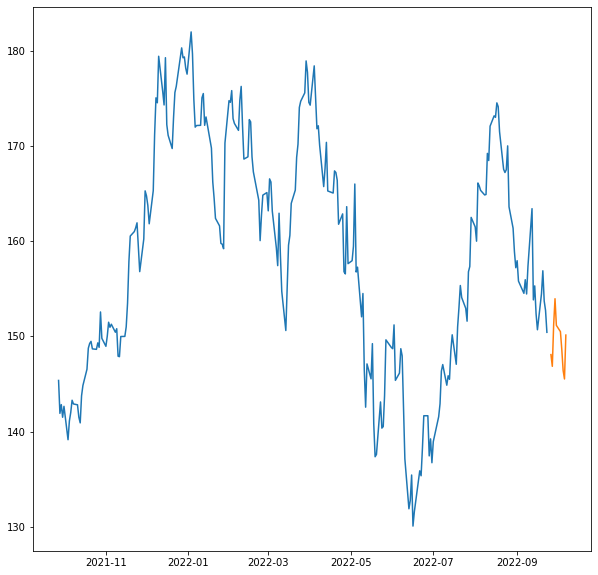

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(data["Date"],data["Close"])
plt.plot(forecast["Date"],forecast["Close"])